### 라이브러리 설치 및 폰트 설정

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
# colab 에서도 아래 설치 문구의 주석을 제거하고 설치하고 import 해주기만 하면 한글폰트가 잘 나옵니다.
!pip install koreanize-matplotlib

import koreanize_matplotlib


Defaulting to user installation because normal site-packages is not writeable


### 데이터셋 불러오기

In [2]:
# df = pd.read_csv("boostcourse-ds-510/data/NHIS_OPEN_GJ_2017.CSV.zip", encoding="cp949")
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/NHIS_OPEN_GJ_2017.CSV.zip",
                 encoding="cp949")
df


,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,1,1,13,46,170.0,65.0,91.0,1.0,1.2,...,25.0,3.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
1,2017,2,2,8,41,150.0,45.0,73.4,1.2,1.0,...,10.0,1.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
2,2017,3,1,8,45,175.0,75.0,94.0,1.0,0.8,...,136.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
3,2017,4,2,12,11,155.0,55.0,67.5,0.9,1.0,...,30.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
4,2017,5,1,8,41,175.0,75.0,93.0,1.5,1.5,...,68.0,3.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2017,999996,2,9,41,165.0,55.0,70.0,1.5,1.5,...,11.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
999996,2017,999997,2,9,11,165.0,50.0,68.0,1.2,1.5,...,11.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
999997,2017,999998,2,12,27,155.0,50.0,83.8,0.2,1.0,...,12.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
999998,2017,999999,1,11,47,160.0,70.0,99.0,0.8,0.9,...,35.0,2.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자일련번호       1000000 non-null  int64  
 2   성별코드          1000000 non-null  int64  
 3   연령대코드(5세단위)   1000000 non-null  int64  
 4   시도코드          1000000 non-null  int64  
 5   신장(5Cm단위)     999738 non-null   float64
 6   체중(5Kg 단위)    999732 non-null   float64
 7   허리둘레          999560 non-null   float64
 8   시력(좌)         999712 non-null   float64
 9   시력(우)         999721 non-null   float64
 10  청력(좌)         999758 non-null   float64
 11  청력(우)         999757 non-null   float64
 12  수축기혈압         999924 non-null   float64
 13  이완기혈압         999923 non-null   float64
 14  식전혈당(공복혈당)    999957 non-null   float64
 15  총콜레스테롤        999957 non-null   float64
 16  트리글리세라이드      999957 non-null   float64
 17  HDL콜레스테롤      999956 non-nul

In [4]:
df.describe()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
count,1000000.0,1000000.000000,1000000.000000,1000000.000000,1000000.000000,999738.000000,999732.000000,999560.000000,999712.000000,999721.000000,...,999955.000000,999840.000000,999475.000000,1000000.000000,0.0,0.0,0.0,0.0,398748.000000,1000000.0
mean,2017.0,500000.500000,1.468828,10.539593,33.733031,162.217421,63.409614,81.370788,0.978897,0.976267,...,37.233369,1.606411,0.497007,0.398748,NaN,NaN,NaN,NaN,0.602157,20181126.0
std,0.0,288675.278933,0.499028,2.860117,12.654664,9.399948,12.879205,12.205698,0.610948,0.605323,...,50.605298,0.817844,0.499991,0.489641,NaN,NaN,NaN,NaN,0.590314,0.0
min,2017.0,1.000000,1.000000,5.000000,11.000000,85.000000,20.000000,0.000000,0.100000,0.100000,...,1.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,20181126.0
25%,2017.0,250000.750000,1.000000,8.000000,27.000000,155.000000,55.000000,74.200000,0.700000,0.700000,...,16.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,20181126.0
50%,2017.0,500000.500000,1.000000,11.000000,41.000000,160.000000,60.000000,81.000000,1.000000,1.000000,...,23.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,1.000000,20181126.0
75%,2017.0,750000.250000,2.000000,13.000000,44.000000,170.000000,70.000000,88.000000,1.200000,1.200000,...,40.000000,2.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,1.000000,20181126.0
max,2017.0,1000000.000000,2.000000,18.000000,50.000000,200.000000,180.000000,999.000000,9.900000,9.900000,...,999.000000,3.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,2.000000,20181126.0


# 1번 문제
* 연령대별 허리둘레에 대한 기술통계를 구하려고 합니다. 다음 제공되는 딕셔너리를 통해 연령대코드(5세단위)를 "연령대"로 만들고 아래와 같은 기술통계값을 구해주세요!


age_code를 우선 딕셔너리에 저장하고 '연령대코드(5세단위)'를 통해 '연령대' 컬럼 추가하기.

In [5]:
age_code = {1: '0~4세',
 2: '5~9세',
 3: '10~14세',
 4: '15~19세',
 5: '20~24세',
 6: '25~29세',
 7: '30~34세',
 8: '35~39세',
 9: '40~44세',
 10: '45~49세',
 11: '50~54세',
 12: '55~59세',
 13: '60~64세',
 14: '65~69세',
 15: '70~74세',
 16: '75~79세',
 17: '80~84세',
 18: '85세+'}

age_code

{1: '0~4세',
 2: '5~9세',
 3: '10~14세',
 4: '15~19세',
 5: '20~24세',
 6: '25~29세',
 7: '30~34세',
 8: '35~39세',
 9: '40~44세',
 10: '45~49세',
 11: '50~54세',
 12: '55~59세',
 13: '60~64세',
 14: '65~69세',
 15: '70~74세',
 16: '75~79세',
 17: '80~84세',
 18: '85세+'}

In [6]:
age = df['연령대코드(5세단위)'].replace(age_code)
df['연령대'] = age
df.head()

#확인해보니 마지막에 연령대 컬럼 추가되었음.


,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자,연령대
0,2017,1,1,13,46,170.0,65.0,91.0,1.0,1.2,...,3.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126,60~64세
1,2017,2,2,8,41,150.0,45.0,73.4,1.2,1.0,...,1.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126,35~39세
2,2017,3,1,8,45,175.0,75.0,94.0,1.0,0.8,...,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126,35~39세
3,2017,4,2,12,11,155.0,55.0,67.5,0.9,1.0,...,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126,55~59세
4,2017,5,1,8,41,175.0,75.0,93.0,1.5,1.5,...,3.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126,35~39세


다음으로는, 연령대별 허리둘레에 대한 기술통계 값을 구하기 위해 pivot_table 형태로 출력

In [7]:
df.pivot_table(index = '연령대', values = '허리둘레', aggfunc = "describe")

,25%,50%,75%,count,max,mean,min,std
연령대,,,,,,,,
20~24세,67.5,73.4,81.0,23244.0,999.0,75.152220,47.5,12.251781
25~29세,69.0,76.5,84.2,64898.0,999.0,77.704783,48.0,16.735734
30~34세,72.0,80.1,88.0,77517.0,999.0,81.089268,49.0,22.988111
35~39세,75.0,82.0,89.0,84621.0,999.0,82.094012,9.2,14.522095
40~44세,73.0,80.0,87.0,130912.0,999.0,80.488308,42.1,10.803098
45~49세,74.0,81.0,87.0,118357.0,137.0,80.822449,40.0,9.521622
50~54세,75.0,81.0,87.0,129833.0,142.0,81.062754,6.5,9.095438
55~59세,76.0,82.0,87.5,112175.0,139.0,81.799905,32.0,8.730398
60~64세,77.0,83.0,88.0,106491.0,137.0,82.722769,0.0,8.596176


기술통계 mean값을 확인해보니 연령대가 증가할수록 허리 둘레가 조금씩 증가하는 추세가 보이는 것 같다. 가설을 설정하고 시각화 및 상관을 통해서 검증해보자
##### 가설: 연령대가 증가할수록 허리 둘레도 증가한다.

In [8]:
# 시각화하기 전에 연령대 오름차순으로 데이터 정렬하기

df_age_asc = df.sort_values('연령대')
df_age_asc.head()


,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자,연령대
324201,2017,324202,2,5,48,160.0,70.0,80.0,1.0,1.2,...,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126,20~24세
915896,2017,915897,1,5,41,185.0,110.0,105.0,1.5,0.8,...,3.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126,20~24세
370598,2017,370599,1,5,26,165.0,75.0,86.0,1.2,1.5,...,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126,20~24세
741297,2017,741298,1,5,44,165.0,55.0,81.0,1.0,1.5,...,2.0,1.0,1,NaN,NaN,NaN,NaN,1.0,20181126,20~24세
33238,2017,33239,2,5,41,160.0,75.0,89.8,1.5,1.5,...,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126,20~24세


<AxesSubplot:xlabel='연령대', ylabel='허리둘레'>

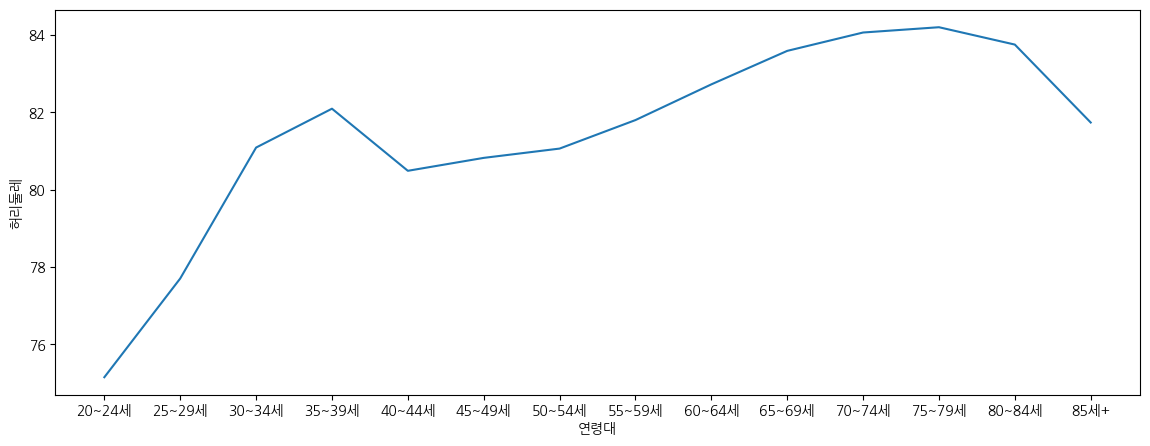

In [9]:
plt.figure(figsize=(14,5))
sns.lineplot(data = df_age_asc, x='연령대', y="허리둘레", ci=None)

- 그래프를 확인해보니, 20세부터 35-39세전까지는 증가하는 추세지만 그 이후로 잠깐 감소했다가 다시 증가하는 추세를 보이고 있다.
허리둘레와 연령대의 상관관계를 통해 둘의 관계를 정밀하게 확인해보자!

In [10]:
age_waist_columns = ['연령대코드(5세단위)', '허리둘레']
df_age_waist = df[age_waist_columns]
df_age_waist_corr = df_age_waist.corr()
df_age_waist_corr

,연령대코드(5세단위),허리둘레
연령대코드(5세단위),1.00000,0.11794
허리둘레,0.11794,1.00000


허리둘레와 연령대코드의 상관은 0.117 정도로 높은 편은 아니었다. 
#### ▶ 따라서, 연령대가 증가할수록 허리둘레도 증가한다는 가설은 수용하기 어려울 것이다.

# 2번 문제
### "음주여부", "흡연상태", "연령대코드(5세단위)", "성별코드"에 대한 상관계수를 구하고 시각화 해주세요.

In [11]:
# "음주여부", "흡연상태", "연령대코드(5세단위)", "성별코드" 4가지 지표만 추출하여 데이터프레임 생성 후 상관관계 구하기.

drink_smoke_age_sex = ["음주여부", "흡연상태", "연령대코드(5세단위)", "성별코드"]
df_drink_smoke_age_sex = df[drink_smoke_age_sex]
df_drink_smoke_age_sex_corr = df_drink_smoke_age_sex.corr()
df_drink_smoke_age_sex_corr

,음주여부,흡연상태,연령대코드(5세단위),성별코드
음주여부,1.000000,0.352014,-0.283296,-0.368630
흡연상태,0.352014,1.000000,-0.125714,-0.588491
연령대코드(5세단위),-0.283296,-0.125714,1.000000,0.080093
성별코드,-0.368630,-0.588491,0.080093,1.000000


In [12]:
mask = np.triu(np.ones_like(df_drink_smoke_age_sex_corr, dtype=bool))
mask

array([[ True,  True,  True,  True],
       [False,  True,  True,  True],
       [False, False,  True,  True],
       [False, False, False,  True]])

<AxesSubplot:>

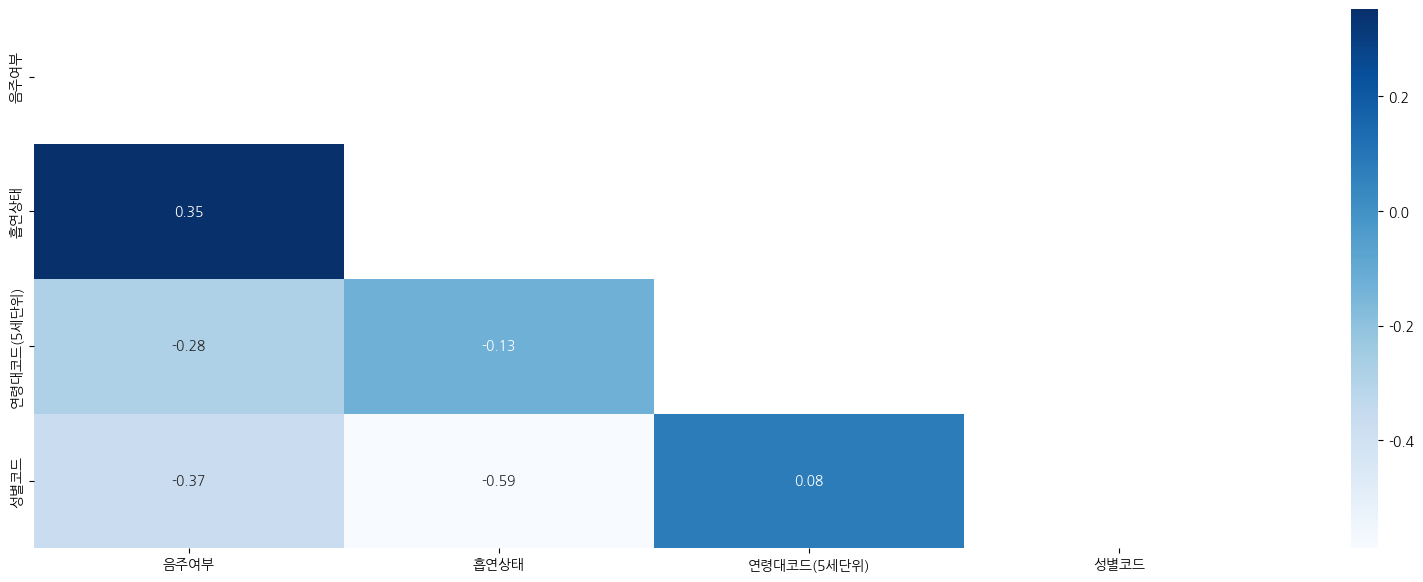

In [13]:
# heatmap으로 음주, 흡연, 연령 ,성별의 상관관계 시각화
plt.figure(figsize=(20,7))
sns.heatmap(data=df_drink_smoke_age_sex_corr, annot=True, fmt=".2f", cmap="Blues", mask=mask)

우선, 성별과 흡연에서 -0.59로 꽤 큰 음의 상관을 보인다. 흡연은 1(피우지 않는다), 2(이전에 피웠으나 끊었다), 3(현재도 피우고 있다). 즉, 수치가 높아질수록 흡연을 한다는 의미. 성별은 1 (남성), 2(여성). 따라서, 흡연과 성별 사이에 음의 상관이 있다는 뜻은 남성일수록 흡연을 더 많이 한다는 의미이다. 

https://www.index.go.kr/unify/idx-info.do?idxCd=4237
실제로 남성이 여성보다 흡연률이 높다는 지표를 확인할 수 있다. 2020년도 기준으로 남성 34%, 여성 6.6% 흡연률을 보이고 있다. 

흡연과 마찬가지로 음주도 성별과 음의 상관 -0.37을 갖는 것으로 나타난다. 남성이 여성보다 음주도 더 많이 한다는 뜻으로 이해할 수 있다. 아래와 같이 그래프로 시각화한 것을 보면 음주에서 남성들이 두 배 이상의 수치를 보이고 있음

<AxesSubplot:xlabel='음주여부', ylabel='count'>

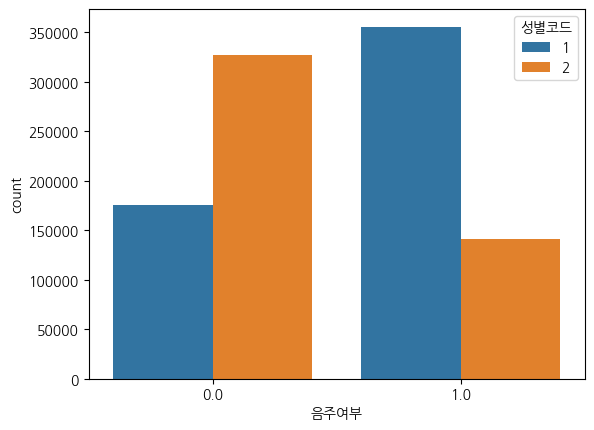

In [14]:
sns.countplot(data=df, x='음주여부', hue='성별코드')

음주와 흡연도 0.35로 양의 상관관계를 보이고 있음. 이 둘의 관계는 3번 문제에서 더 자세히 다루자!

# 3번 문제
### 흡연하는 사람과 음주하는 사람들의 수는 얼마나 차이가 있을까요?
* 건강보험에서 제공하고 있는 데이터는 용량을 줄이기 위해 대부분의 데이터를 숫자 형태로 제공하고 있습니다. replace 기능을 사용하면 딕셔너리의 값을 의미하는 문자 형태로 변경해 볼 수 있습니다. 다음 제공되는 딕셔너리 값을 사용하여 숫자가 의미하는 문자 형태로 변경한 뒤 전체 데이터에서 음주와 흡연에 대한 교차 테이블을 구해 각 해당 빈도수를 구하고 시각화 해주세요!



In [15]:
# 흡연 1(피우지 않는다), 2(이전에 피웠으나 끊었다), 3(현재도 피우고 있다)
# 음주 0(마시지 않은다), 1(마신다)
# 흡연, 음주 여부를 나타내는 텍스트 형태의 컬럼 추가 

smoke = {1 : "흡연안함", 2: "끊음", 3: "흡연중"}
drink = {0: "안마심", 1: "마심"}

df["흡연"] = df['흡연상태'].replace(smoke)
df["음주"] = df['음주여부'].replace(drink)

df.head()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자,연령대,흡연,음주
0,2017,1,1,13,46,170.0,65.0,91.0,1.0,1.2,...,1,NaN,NaN,NaN,NaN,1.0,20181126,60~64세,흡연중,안마심
1,2017,2,2,8,41,150.0,45.0,73.4,1.2,1.0,...,1,NaN,NaN,NaN,NaN,1.0,20181126,35~39세,흡연안함,안마심
2,2017,3,1,8,45,175.0,75.0,94.0,1.0,0.8,...,1,NaN,NaN,NaN,NaN,0.0,20181126,35~39세,흡연안함,안마심
3,2017,4,2,12,11,155.0,55.0,67.5,0.9,1.0,...,0,NaN,NaN,NaN,NaN,NaN,20181126,55~59세,흡연안함,마심
4,2017,5,1,8,41,175.0,75.0,93.0,1.5,1.5,...,0,NaN,NaN,NaN,NaN,NaN,20181126,35~39세,흡연중,안마심


In [16]:
pd.crosstab(index=df.음주, columns=df.흡연)

흡연,끊음,흡연안함,흡연중
음주,,,
마심,120779,213743,162166
안마심,55334,394503,52845


<AxesSubplot:xlabel='흡연', ylabel='count'>

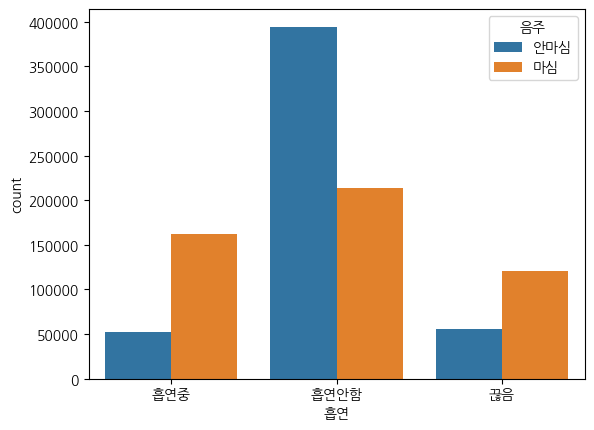

In [17]:
sns.countplot(data=df, x='흡연', hue='음주')

2번에서 상관관계를 구하면서 흡연과 음주의 양의 상관을 확인할 수 있었다. 흡연중에서 음주하는 비율이 비음주보다 3배 가량 높게 나타나고, 비흡연에서 음주가 비음주보다 약 2배 정도 낮게 나타난 것을 확인할 수 있음. 즉, 흡연할수록 음주하는 비율도 높아진다.

#### 그렇다면, 흡연+음주하는 사람들의 건강 지표들은 비흡연+비음주에 비해 월등히 안 좋은 수치를 기록할까?

주요 건강지표 몇 개를 통해서 비교해보자.

In [18]:
df.columns
# 이 중에서 트리글리세라이드, 감마지티피를 대표적으로 비교해보자.
# 트리글리세라이드는 중성지방을 의미한다. 주로 식사 후 필요치 않은 에너지가 지방으로 전환될 때 혈중 중성지방 농도가 증가.
# 감마지티피는 간, 신장, 췌장, 비장, 심장, 뇌에 분포하는 효소다. 수치가 높을수록 간 건강이 좋지 않음을 의미한다. 

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상',
       '치석', '데이터공개일자', '연령대', '흡연', '음주'],
      dtype='object')

In [19]:
df.pivot_table(index = ['흡연', '음주'], values = ['트리글리세라이드', '감마지티피'])
# 흡연중 + 마심에서 감마지티피, 트리글리세라이드 수치 모두 제일 높게 나옴. 반면, 흡연안함 + 안마심에서 두 수치 모두 제일 낮게 나왔다.
# 역시 음주와 흡연은 지방, 간 관련 수치에서 치명적인 영향을 주는 것으로 볼 수 있다. 

감마지티피    트리글리세라이드
흡연   음주                        
끊음   마심   52.943241  153.992349
     안마심  33.732825  136.375278
흡연안함 마심   32.891362  114.975316
     안마심  24.740946  116.268560
흡연중  마심   63.455964  175.059767
     안마심  35.471491  150.350132

# 4번 문제
### 체중이 120Kg 이상인 데이터를 찾아 "총콜레스테롤", "감마지티피" 값을 음주여부에 따라 산점도로 시각화해주세요!
* 체중이 120Kg 이 넘는다면 비만으로 건강관리가 필요합니다. 120Kg 이상인 데이터를 찾아 "총콜레스테롤", "감마지티피" 값을 음주여부에 따라 산점도로 시각화해주세요! (이때 120Kg 도 포함되게 구합니다.) 그래프의 설정과 seaborn 버전에 따라 여백이나 회귀선의 시작과 끝점에 차이가 있을 수 있습니다.


In [20]:
df_weight120 = df[df['체중(5Kg 단위)'] >= 120]
df_weight120.head()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자,연령대,흡연,음주
1219,2017,1220,2,6,41,170.0,120.0,116.0,0.7,0.9,...,0,NaN,NaN,NaN,NaN,NaN,20181126,25~29세,흡연중,안마심
2309,2017,2310,1,6,30,190.0,155.0,127.0,0.8,0.9,...,1,NaN,NaN,NaN,NaN,1.0,20181126,25~29세,흡연중,안마심
3497,2017,3498,1,7,46,175.0,120.0,119.0,1.2,1.2,...,0,NaN,NaN,NaN,NaN,NaN,20181126,30~34세,흡연중,마심
3685,2017,3686,1,7,30,180.0,140.0,127.0,1.5,1.5,...,1,NaN,NaN,NaN,NaN,0.0,20181126,30~34세,끊음,안마심
5788,2017,5789,1,8,41,175.0,140.0,124.0,1.0,1.0,...,0,NaN,NaN,NaN,NaN,NaN,20181126,35~39세,흡연안함,안마심


<Figure size 1500x800 with 0 Axes>

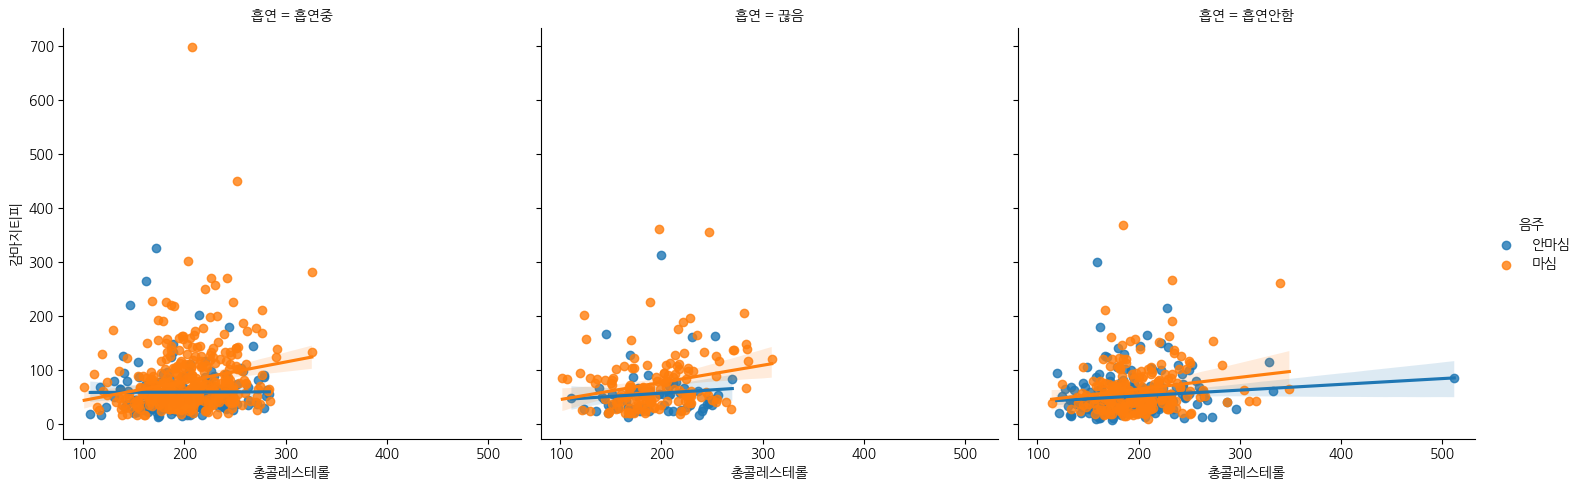

In [21]:
plt.figure(figsize=(15,8))
sns.lmplot(data=df_weight120, x="총콜레스테롤", y="감마지티피", hue="음주", col="흡연")

In [22]:
df[['총콜레스테롤','감마지티피']].describe()

,총콜레스테롤,감마지티피
count,999957.000000,999955.000000
mean,195.515105,37.233369
std,38.937646,50.605298
min,10.000000,1.000000
25%,169.000000,16.000000
50%,193.000000,23.000000
75%,219.000000,40.000000
max,2245.000000,999.000000


총콜레스테롤은 195.5, 감마지티피는 37.2의 전체 평균치를 보이고 있다. 총콜레스테롤은 흡연, 음주 여부에 관계 없이 200을 기준으로 양 옆으로 고르게 분포되어 있는 것을 봤을 때 어느 정도 전체 평균 값에서 크게 벗어나지 않는다고 판단할 수 있겠다. 그러나, 감마지티피는 전체 평균이 37인데 반해 한 눈에 봐도 50을 넘어서는 지표들이 상당히 많은 것을 봐서는 전체 평균보다 확실히 더 높다는 결론을 낼 수 있다.
또한, 전체적인 분포를 봤을 때, 음주를 하는 주황색 점들이 파란점을 덮어서 조금 더 위에 위치하는 것을 봐서 음주가 감마지티피에 영향을 준다고도 볼 수 있겠다.
음주, 흡연, 감마지티피, 총콜레스테롤 간의 상관 관계를 구해서 이들간의 연관성을 파악해보자!

In [24]:
drink_smoke_chol_gamma = ['체중(5Kg 단위)', "음주여부", "흡연상태", "총콜레스테롤", "감마지티피"]
df_drink_smoke_chol_gamma  = df[drink_smoke_chol_gamma]
df_drink_smoke_chol_gamma_corr = df_drink_smoke_chol_gamma.corr()
df_drink_smoke_chol_gamma_corr

,체중(5Kg 단위),음주여부,흡연상태,총콜레스테롤,감마지티피
체중(5Kg 단위),1.000000,0.259927,0.355834,0.062472,0.218271
음주여부,0.259927,1.000000,0.352014,0.021155,0.206329
흡연상태,0.355834,0.352014,1.000000,0.011543,0.242169
총콜레스테롤,0.062472,0.021155,0.011543,1.000000,0.095313
감마지티피,0.218271,0.206329,0.242169,0.095313,1.000000


총콜레스테롤은 위의 그래프와 같이 체중, 음주, 흡연과 큰 상관을 보이고 있지 않다.
반면, 감마지티피는 체중, 음주, 흡연 모두와 상관이 나타나고 있다. 음주와 감마지티피는 0.2 의 양의 상관, 체중과 감마지티피는 0.21 양의 상관. 체중과 음주가 거의 비슷하게 감마지티피 수치와 연관이 있다고 볼 수 있다. 흡연과 감마지티피도 0.24로 비슷한 수준이다. 
##### 따라서, 감마지티피 수치를 낮추기 위해서는 금연, 금주, 체중 감량이 필요하다고 볼 수 있다!

# 5번 문제
### 연령대별로 시력은 얼마나 차이가 날까요? 연령대, 성별 좌우 평균 시력을 시각화 해주세요!
* 시력은 0.1~2.5 사이의 값으로 표기하며 0.1 이하의 시력은 0.1, 실명은 9.9로 표기합니다.
* 실명인 데이터를 평균에 포함하게 되면 시력에 대한 평균을 제대로 구하기 어렵습니다. 실명 데이터를 제외하고 연령대, 성별에 따른 평균 좌우 시력을 구해주세요!
* 서브플롯으로 시각화하여 표현해 주고 matplotlib 에 대한 사용법은 다음의 영상도 함께 참고해 주세요! (https://www.youtube.com/watch?v=ZTRKojTLE8M)
* 시각화 예시는 참고사항으로 스타일이나 폰트 구성이 달라도 연령대, 성별 좌우평균시력을 시각화 하면 됩니다.


시력 데이터의 실명 값(9.9)를 제거하는 전처리 과정이 필요함.

In [25]:
df['시력(좌)'].describe()

count    999712.000000
mean          0.978897
std           0.610948
min           0.100000
25%           0.700000
50%           1.000000
75%           1.200000
max           9.900000
Name: 시력(좌), dtype: float64

In [26]:
df['시력(우)'].describe()

count    999721.000000
mean          0.976267
std           0.605323
min           0.100000
25%           0.700000
50%           1.000000
75%           1.200000
max           9.900000
Name: 시력(우), dtype: float64

In [27]:
df_sight = df[(df['시력(좌)'] != 9.9) & (df['시력(우)'] != 9.9)].copy()
df_sight.describe()

# 시력(좌), (우) 모두 max 2.5로 나온 걸 보니 실명 데이터는 잘 제거되었음!

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
count,994187.0,994187.000000,994187.000000,994187.000000,994187.000000,993931.000000,993925.000000,993764.000000,993899.000000,993908.000000,...,994144.000000,994030.000000,993666.000000,994187.000000,0.0,0.0,0.0,0.0,397328.000000,994187.0
mean,2017.0,500013.453291,1.469115,10.523870,33.728093,162.237736,63.424348,81.358665,0.950679,0.948685,...,37.208731,1.606620,0.497944,0.399651,NaN,NaN,NaN,NaN,0.602150,20181126.0
std,0.0,288669.803974,0.499045,2.852974,12.654663,9.394133,12.881921,12.218973,0.342590,0.340885,...,50.526082,0.818025,0.499996,0.489827,NaN,NaN,NaN,NaN,0.590202,0.0
min,2017.0,1.000000,1.000000,5.000000,11.000000,85.000000,20.000000,0.000000,0.100000,0.100000,...,1.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,20181126.0
25%,2017.0,250024.500000,1.000000,8.000000,27.000000,155.000000,55.000000,74.200000,0.700000,0.700000,...,16.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,20181126.0
50%,2017.0,500017.000000,1.000000,10.000000,41.000000,160.000000,60.000000,81.000000,1.000000,1.000000,...,23.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,1.000000,20181126.0
75%,2017.0,749982.500000,2.000000,13.000000,44.000000,170.000000,70.000000,88.000000,1.200000,1.200000,...,40.000000,2.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,1.000000,20181126.0
max,2017.0,1000000.000000,2.000000,18.000000,50.000000,200.000000,180.000000,999.000000,2.500000,2.500000,...,999.000000,3.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,2.000000,20181126.0


In [28]:
df_sight = df_sight.sort_values('연령대')
# 그래프에서 연령대별 차이를 알기 편하게 연령대로 정렬.

<AxesSubplot:xlabel='시력(우)', ylabel='연령대'>

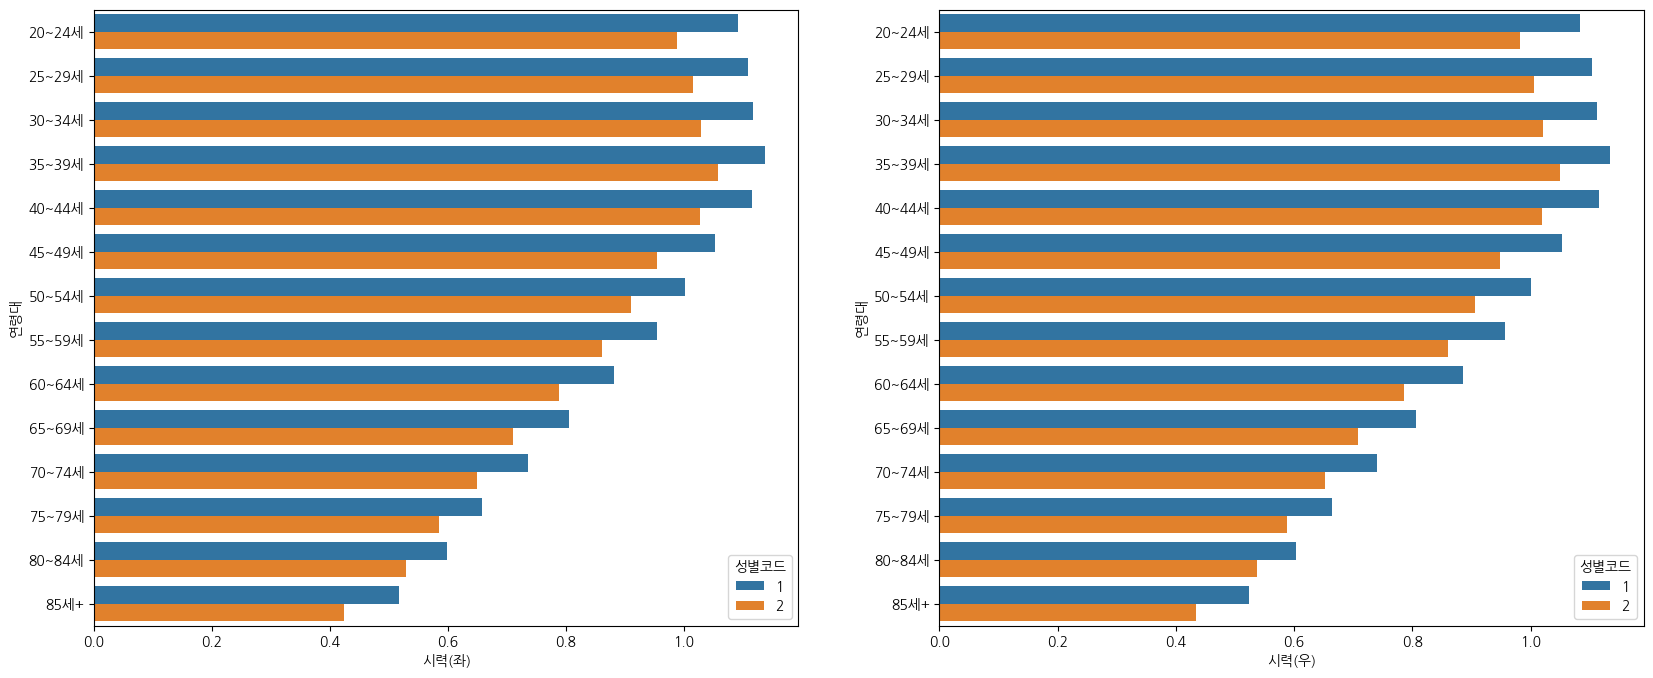

In [29]:
fig, ax = plt.subplots(ncols=2, figsize=(20,8))
sns.barplot(data=df_sight, x= '시력(좌)',  y='연령대', hue='성별코드', ci=None, ax=ax[0])
sns.barplot(data=df_sight, x= '시력(우)',  y='연령대', hue='성별코드', ci=None, ax=ax[1])

연령대가 높아질수록 좌, 우 시력 모두 점차 줄어드는 것을 쉽게 확인할 수 있다.
##### 그러면, 시력과 연령대 간의 상관관계는 어떻게 될까? 성별에 따라서 시력의 노화에 차이도 존재할까?

In [30]:
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상',
       '치석', '데이터공개일자', '연령대', '흡연', '음주'],
      dtype='object')

In [31]:
# 시력 좌, 우, 연령대, 성별의 상관을 구해보자!
sight_age_sex = ['시력(좌)', '시력(우)', '연령대코드(5세단위)', '성별코드']
df_sight_age_sex = df[sight_age_sex]
df_sight_age_sex_corr = df_sight_age_sex.corr()
df_sight_age_sex_corr

,시력(좌),시력(우),연령대코드(5세단위),성별코드
시력(좌),1.000000,0.316552,-0.172696,-0.098217
시력(우),0.316552,1.000000,-0.170176,-0.102314
연령대코드(5세단위),-0.172696,-0.170176,1.000000,0.080093
성별코드,-0.098217,-0.102314,0.080093,1.000000


In [32]:
mask = np.triu(np.ones_like(df_sight_age_sex_corr, dtype=bool))
mask

array([[ True,  True,  True,  True],
       [False,  True,  True,  True],
       [False, False,  True,  True],
       [False, False, False,  True]])

<AxesSubplot:>

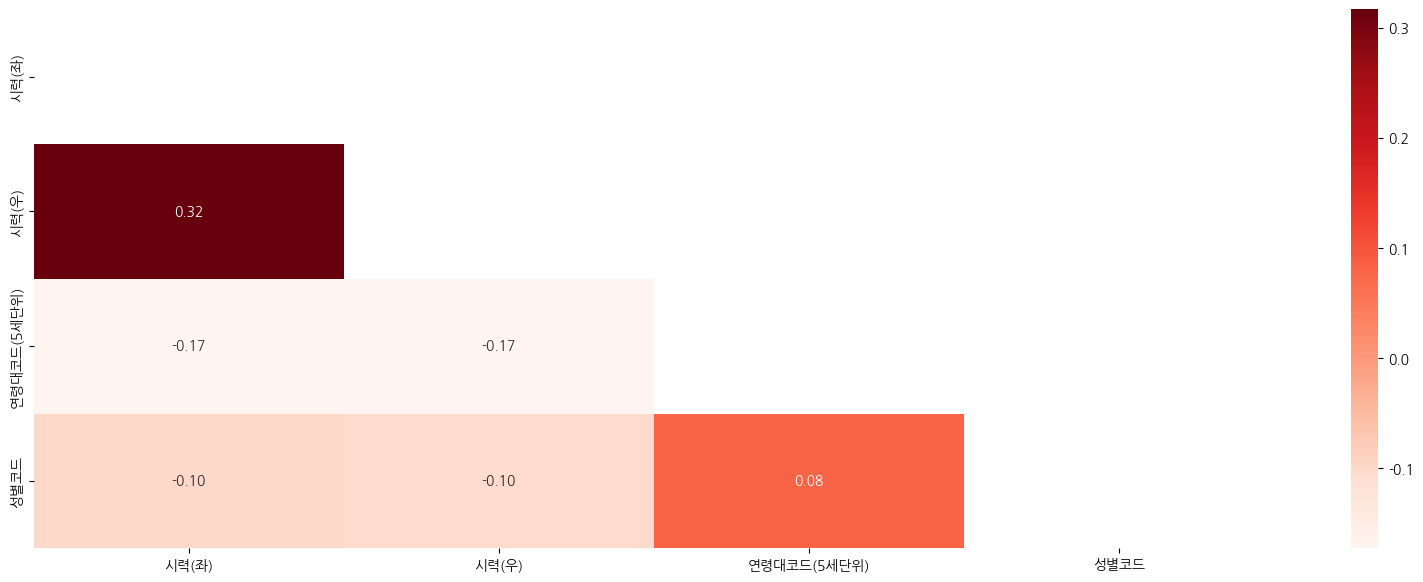

In [33]:
# heatmap으로 시각화
plt.figure(figsize=(20,7))
sns.heatmap(data=df_sight_age_sex_corr, annot=True, fmt=".2f", cmap="Reds", mask=mask)

▶ 연령대와 시력 간의 음의 상관이 나타남. 즉, 연령대코드가 높아질수록 시력은 떨어진다는 의미!